In [2]:
!unzip dataset.zip -d /content/

Archive:  dataset.zip
   creating: /content/NDVI/
   creating: /content/NDVI/mild/
  inflating: /content/NDVI/mild/HW_NDVI_2018_04_01_first_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_04_16_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_05_16_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_06_15_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_08_29_first_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_10_13_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_10_28_first_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_11_12_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_11_27_first_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_12_12_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2018_12_27_first_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2019_01_11_second_half.png  
  inflating: /content/NDVI/mild/HW_NDVI_2019_02_10_second_half.png  
  inflating: /content/NDV

In [5]:
import os
from PIL import Image
import numpy as np

dataset_path = 'NDVI'
classes = ['no', 'mild', 'strong']
label_dict = {'no': 0, 'mild': 1, 'strong': 2}

images_data = []
labels = []

for label in classes:
    class_path = os.path.join(dataset_path, label)
    for image_file in os.listdir(class_path):
        img_path = os.path.join(class_path, image_file)
        img = Image.open(img_path)
        img = img.resize((128, 128))
        img_array = np.array(img)

        images_data.append(img_array)
        labels.append(label_dict[label])

images_data = np.array(images_data)
labels = np.array(labels)

print(f"Loaded {len(images_data)} images with labels")


Loaded 193 images with labels


SVM - Accuracy: 0.8974358974358975


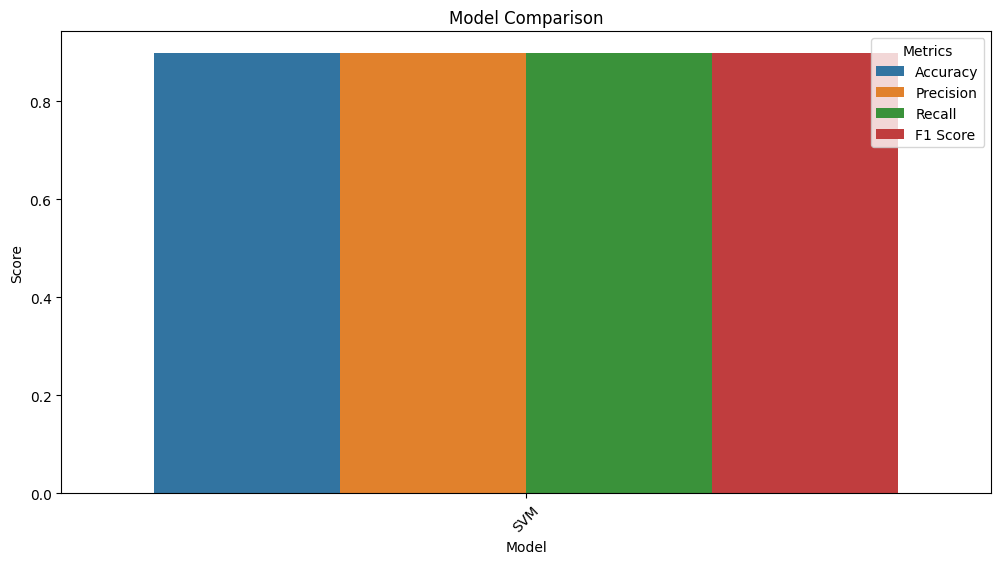

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X = np.array(images_data)
y = np.array(labels)

X = X / 255.0

X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'SVM': SVC()
}

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
results_melted = pd.melt(results_df, id_vars=['Model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
sns.barplot(x='Model', y='value', hue='variable', data=results_melted)
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")


Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9092473118279571
Test Accuracy: 0.8974358974358975
Test Precision: 0.8980186480186481
Test Recall: 0.8974358974358975
Test F1 Score: 0.8941798941798942


Loaded 193 images with labels
Test Accuracy: 0.9230769230769231
Test Precision: 0.9226699226699228
Test Recall: 0.9230769230769231
Test F1 Score: 0.9219907178828873


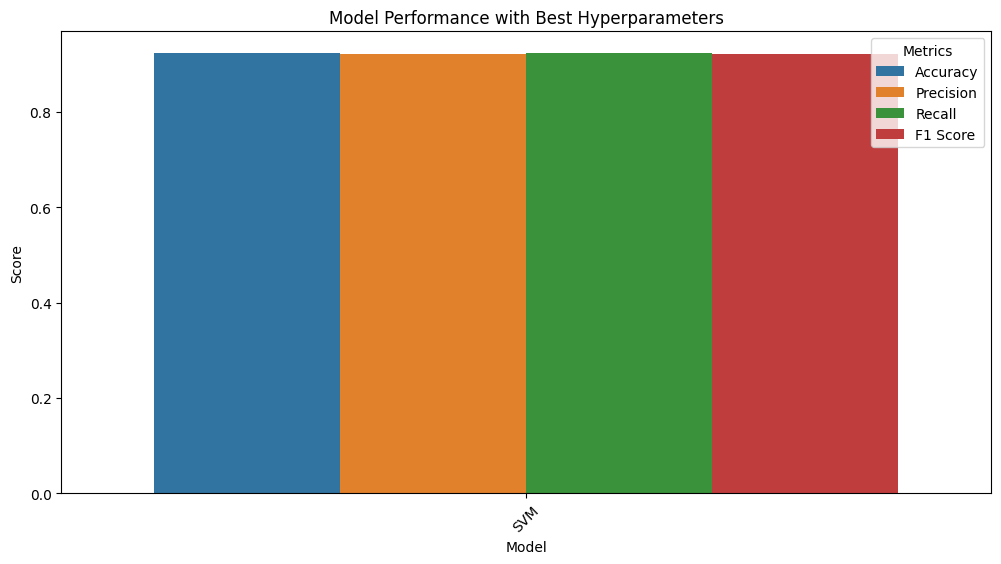

In [8]:
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np

dataset_path = 'NDVI'
classes = ['no', 'mild', 'strong']
label_dict = {'no': 0, 'mild': 1, 'strong': 2}

images_data = []
labels = []

for label in classes:
    class_path = os.path.join(dataset_path, label)
    for image_file in os.listdir(class_path):
        img_path = os.path.join(class_path, image_file)
        img = Image.open(img_path)
        img = img.resize((512, 512))
        img_array = np.array(img)

        images_data.append(img_array)
        labels.append(label_dict[label])

images_data = np.array(images_data)
labels = np.array(labels)

print(f"Loaded {len(images_data)} images with labels")

X = np.array(images_data)
y = np.array(labels)

X = X / 255.0
X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(C=10, kernel='rbf', gamma='scale')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")